Loading All need Libiries


In [1]:
#Importing all the required Libiries
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import rasterio
from rasterio.mask import mask
import fiona

Loading the data 

In [2]:
#Loading the datas
# Path of the shape file
path = "Shape_Data/local_unit.shp"
# Loading the shape file
gdf = gpd.read_file(path)

#Check the data
gdf.head(5)

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."



Pre Data Processing

In [3]:
#Checking missing values or not
print(gdf.isnull().sum())

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


Since all have zeor(0) which means our data is clean

Visualizating the data 

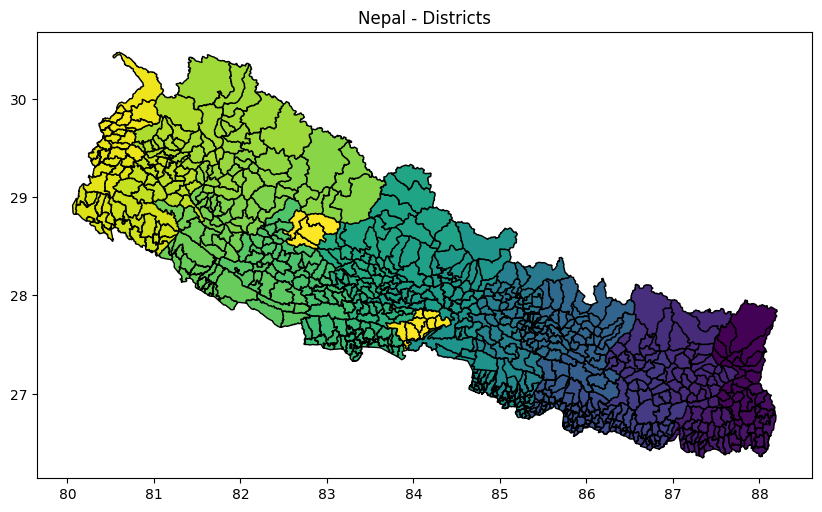

In [4]:
# Plotting the Nepal Data with Districts
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Nepal - Districts")
plt.show()

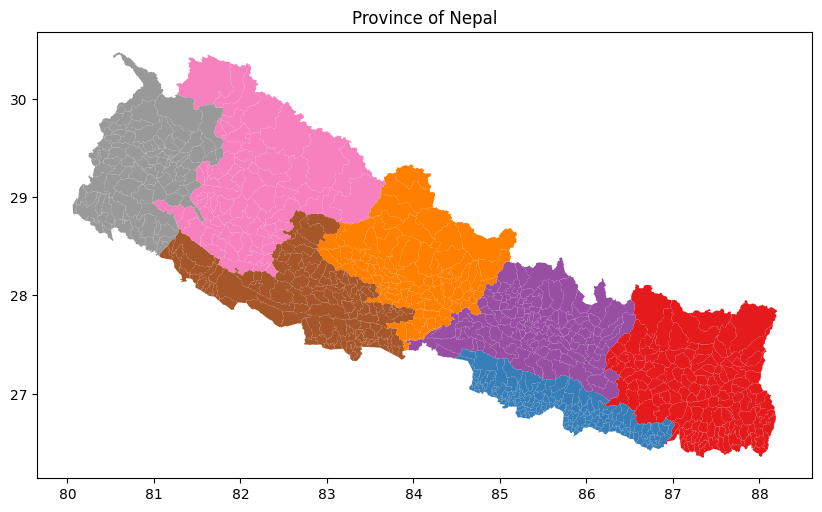

In [5]:
# Plotting the Nepal Data with Province
gdf.plot(column="STATE_CODE", cmap="Set1", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.show()

Working and Loading with Temperature Data

In [6]:
#Loading Temperature Data

raster_precipitation_path_2020 = "nepal_climate_data/nepal_precipitation_2020.tif"
raster_precipitation_path_2050 = "nepal_climate_data/nepal_precipitation_2050.tif"
raster_temperature_path_2020 = "nepal_climate_data/nepal_temperature_2020.tif"
raster_temperature_path_2050 = "nepal_climate_data/nepal_temperature_2050.tif"

In [7]:
# Function to load raster image
def read_raster(path):
	with rasterio.open(path) as src:
		raster_src = src.read(1)
		profile = src.profile

	return raster_src, profile

In [8]:
# Loading the raster image
temp_2020, temp_profile_2020 = read_raster(raster_temperature_path_2020)
temp_2050, temp_profile_2050 = read_raster(raster_temperature_path_2050)
precip_2020, precip_profile_2020 = read_raster(raster_precipitation_path_2020)
precip_2050, precip_profile_2050 = read_raster(raster_precipitation_path_2050)

Visualize Temperature Raster Data

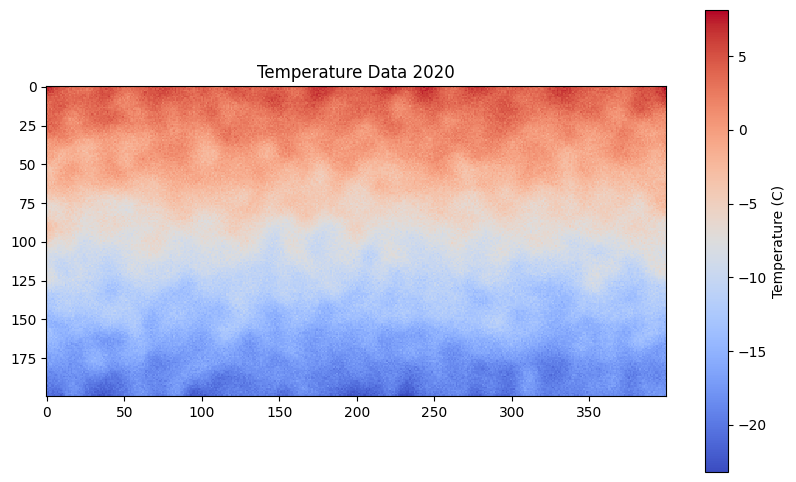

In [9]:
# Visualization of Nepal temperature 2020
plt.figure(figsize=(10, 6))
plt.imshow(temp_2020, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (C)")
plt.title("Temperature Data 2020")
plt.show()

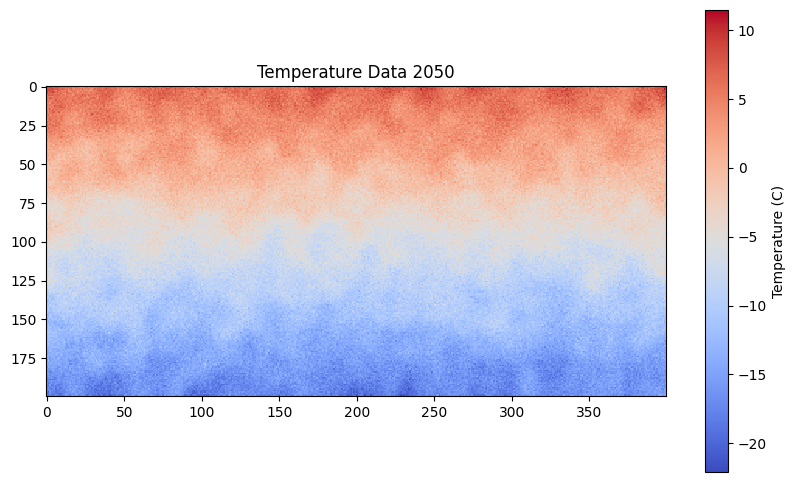

In [10]:
# Visualization of Nepal temperature 2050

plt.figure(figsize=(10, 6))
plt.imshow(temp_2050, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (C)")
plt.title("Temperature Data 2050")
plt.show()

Mask raster with the vector file 


In [11]:
# Function to Mask raster with the vector file
def mask_raster(raster_path, vector_path):
    with fiona.open(vector_path, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]  # Read vector geometry

    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, shapes, crop=True)  # Mask raster
        out_image = out_image[0]  # Extract the first band



    return out_image

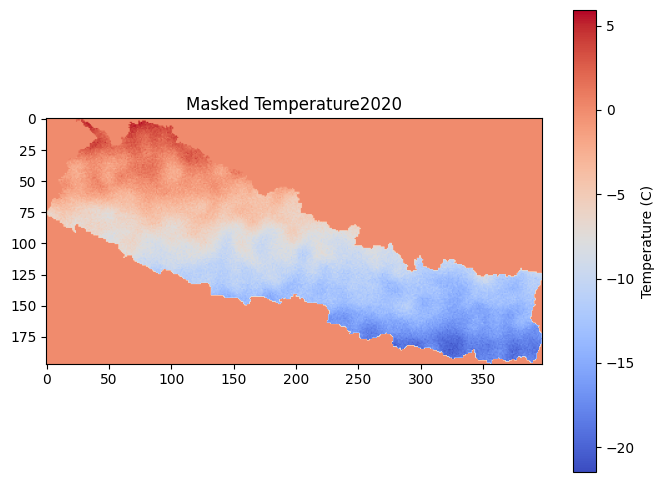

In [12]:
#visulizing the data
mask_temp_2020 = mask_raster(raster_temperature_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2020, cmap="coolwarm")
plt.title("Masked Temperature2020")
plt.colorbar(label="Temperature (C)")
plt.show()



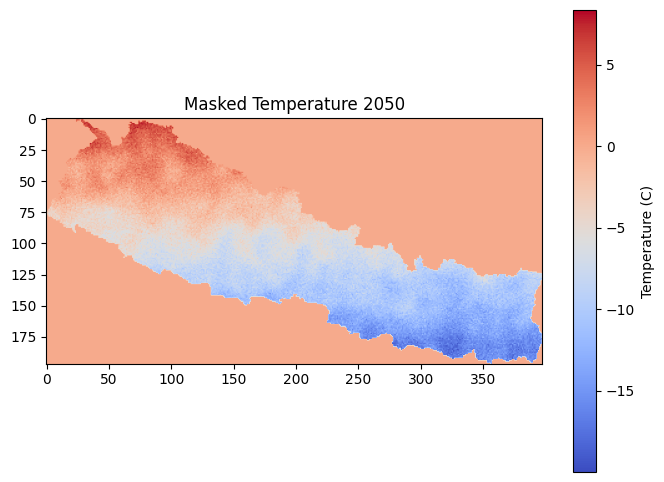

In [13]:
# visulizing the data 2050 Temperature
mask_temp_2050 = mask_raster(raster_temperature_path_2050, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2050, cmap="coolwarm")
plt.title("Masked Temperature 2050")
plt.colorbar(label="Temperature (C)")
plt.show()

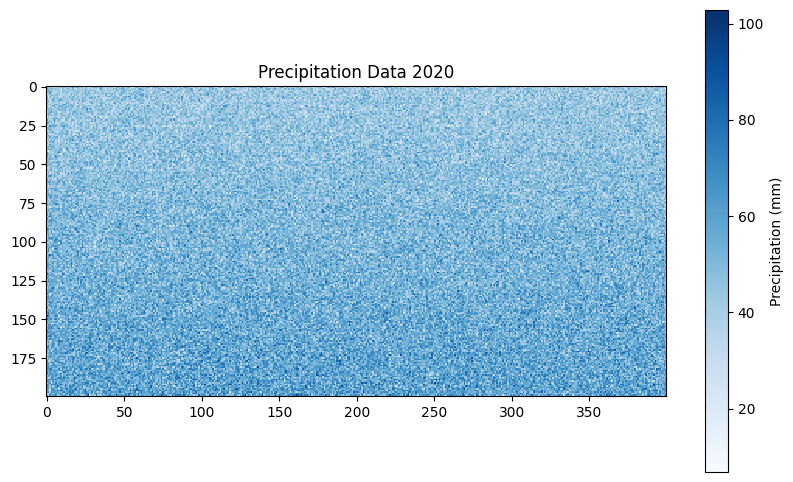

In [14]:
# Visualization of Nepal Precipitation  2020

plt.figure(figsize=(10, 6))
plt.imshow(precip_2020, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Precipitation (mm)")
plt.title("Precipitation Data 2020")
plt.show()

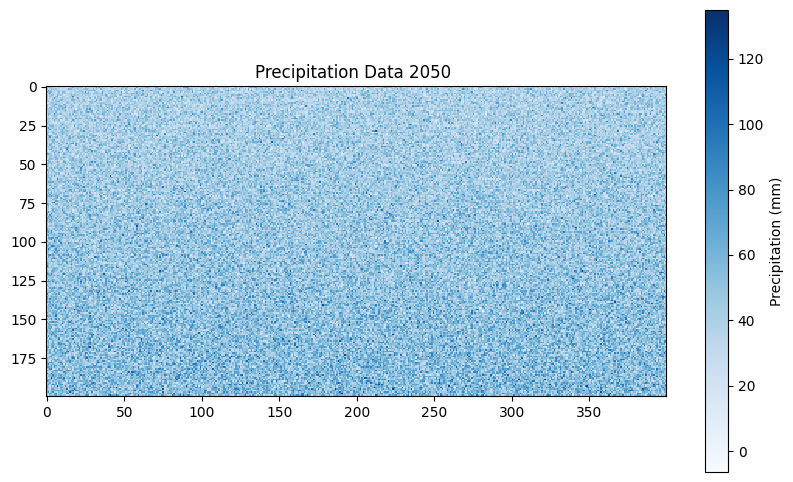

In [15]:
# Basic Visualization of Nepal Precipitation  2050

plt.figure(figsize=(10, 6))
plt.imshow(precip_2050, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Precipitation (mm)")
plt.title("Precipitation Data 2050 ")
plt.show()

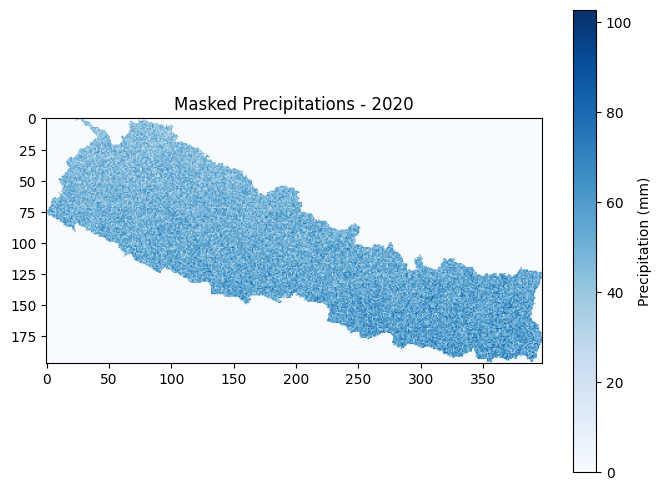

In [16]:
# Visulizing  2020 Precipitaiton
mask_precip_2020 = mask_raster(raster_precipitation_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2020, cmap="Blues")
plt.title("Masked Precipitations - 2020")
plt.colorbar(label="Precipitation (mm)")
plt.show()

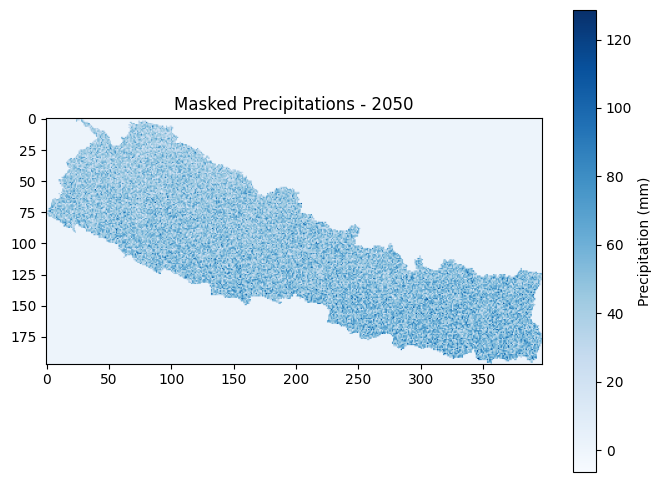

In [17]:
# Visulizing 2050 Precipitaiton
mask_precip_2050 = mask_raster(raster_precipitation_path_2050, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2050, cmap="Blues")
plt.title("Masked Precipitations - 2050")
plt.colorbar(label="Precipitation (mm)")
plt.show()

Statistics

In [18]:
# Extract statistics of raster data
def raster_stats(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read first band
        stats = {
            "Min": np.min(data),
            "Max": np.max(data),
            "Mean": np.mean(data),
            "Std Dev": np.std(data)
        }
    return stats

# Compare precipitation in 2020 and 2050
precip_2020_stats = raster_stats(raster_precipitation_path_2020)
precip_2050_stats = raster_stats(raster_precipitation_path_2050)

print("Precipitation Stats (2020):", precip_2020_stats)
print("Precipitation Stats (2050):", precip_2050_stats)

Precipitation Stats (2020): {'Min': np.float64(6.8563433623171495), 'Max': np.float64(102.83267376645965), 'Mean': np.float64(50.83796524449648), 'Std Dev': np.float64(11.392472418361306)}
Precipitation Stats (2050): {'Min': np.float64(-6.410086048906941), 'Max': np.float64(134.9692970311526), 'Mean': np.float64(48.285593218473295), 'Std Dev': np.float64(16.390304034131695)}


In [19]:
#Visualizing the monthly trend of temp and precipitation for different years

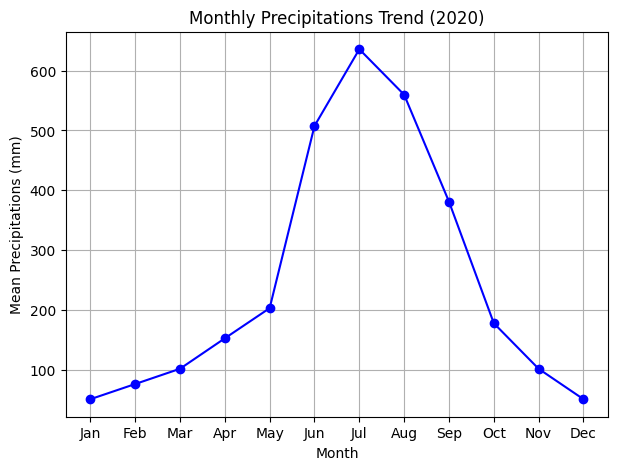

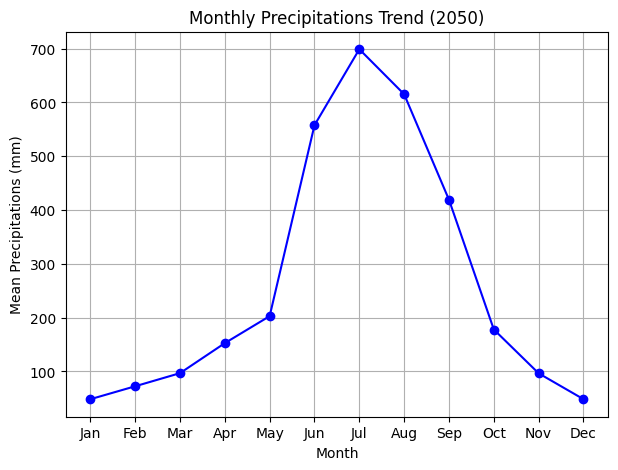

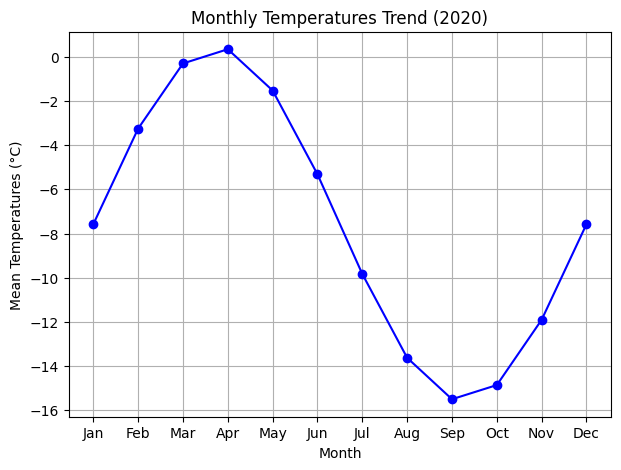

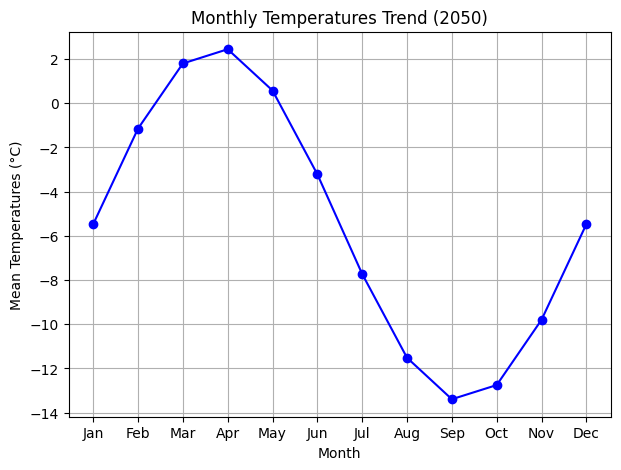

In [20]:
# Function to return monthly values of raster files (band values)
def monthly_values(path):
	with rasterio.open(path) as src:
		monthly_values = [src.read(i) for i in range(1, 13)]  # Load all 12 bands

	return monthly_values

# function to calculate the monthly mean values
def monthly_mean(monthly_values):
	monthly_means = [np.mean(month) for month in monthly_values]
	return monthly_means

# Function to plot the monthly trends of temp or precipitations
def plot_montly_trend(monthly_means, label, units, year):
	# Plot temporal trend
	plt.figure(figsize=(7, 5))
	plt.plot(range(1, 13), monthly_means, marker="o", linestyle="-", color="b")
	plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
	plt.xlabel("Month")
	plt.ylabel(f"Mean {label} ({units})")
	plt.title(f"Monthly {label} Trend ({year})")
	plt.grid()
	plt.show()
monthly_temp_2020 = monthly_values(raster_temperature_path_2020)
monthly_temp_2050 = monthly_values(raster_temperature_path_2050)
monthly_precip_2020 = monthly_values(raster_precipitation_path_2020)
monthly_precip_2050 = monthly_values(raster_precipitation_path_2050)

# Computing the montlhy mean temp and precipitation for 2020 / 50
monthly_mean_temp_2020 = monthly_mean(monthly_temp_2020)
monthly_mean_temp_2050 = monthly_mean(monthly_temp_2050)
monthly_mean_precip_2020 = monthly_mean(monthly_precip_2020)
monthly_mean_precip_2050 = monthly_mean(monthly_precip_2050)

#plotting the montly trend of precipation and temperatures
plot_montly_trend(monthly_mean_precip_2020, "Precipitations", "mm", 2020)
plot_montly_trend(monthly_mean_precip_2050, "Precipitations", "mm", 2050)
plot_montly_trend(monthly_mean_temp_2020, "Temperatures", "°C", 2020)
plot_montly_trend(monthly_mean_temp_2050, "Temperatures", "°C", 2050)

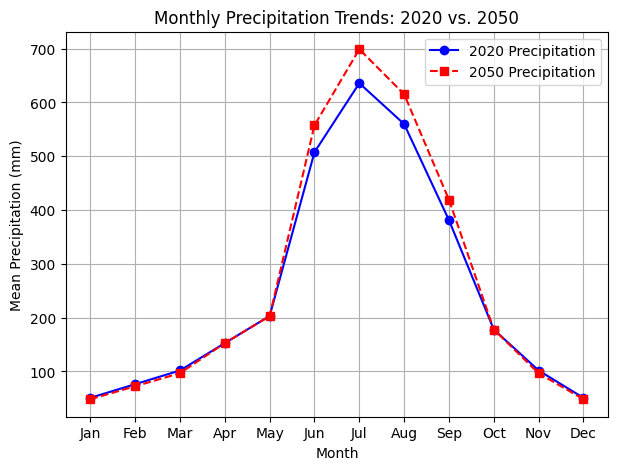

In [21]:
#Create a Precipitation Trend / line plot for both years 2020 and 2050
# Create a Precipitation Trend / line plot for both years 2020 and 2050
plt.figure(figsize=(7, 5))

# Plot 2020 data
plt.plot(range(1, 13), monthly_mean_precip_2020, marker="o", linestyle="-", color="b", label="2020 Precipitation")

# Plot 2050 data
plt.plot(range(1, 13), monthly_mean_precip_2050, marker="s", linestyle="--", color="r", label="2050 Precipitation")

# Formatting
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Mean Precipitation (mm)")
plt.title("Monthly Precipitation Trends: 2020 vs. 2050")
plt.legend()
plt.grid()

# Show the plot
plt.show()


Conclusion from Precipitation Trend Plot
The analysis reveals that June, July, and August experience the highest rainfall, aligning with the rainy season. This pattern holds true for both 2020 and 2050. Apart from these three months, precipitation trends remain consistent across all other months in both years. However, in 2050, rainfall during June, July, and August is slightly higher compared to 2020.


Temperature Trend for 2020 and 2050


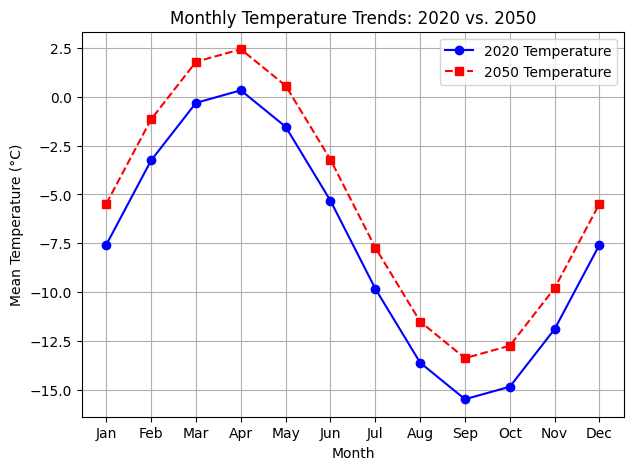

In [22]:
# Create a Temperature Trend / line plot for both years 2020 and 2050
plt.figure(figsize=(7, 5))

# Plot 2020 data
plt.plot(range(1, 13), monthly_mean_temp_2020, marker="o", linestyle="-", color="b", label="2020 Temperature")

# Plot 2050 data
plt.plot(range(1, 13), monthly_mean_temp_2050, marker="s", linestyle="--", color="r", label="2050 Temperature")

# Formatting
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.title("Monthly Temperature Trends: 2020 vs. 2050")
plt.legend()
plt.grid()

# Show the plot
plt.show()

Analysis says: 
The temperature trend in 2020 and 2050 follows a similar pattern. However, temperatures in 2050 are consistently higher by approximately 2 to 2.5 degrees Celsius throughout the year.

Histogram for temperature and precipitation

In [23]:
# function to show the general statistical informatoin about mean median max and min values
def print_stats(stats, label, year):
    print(f"Statistical Description of {label} for {year} - Nepal")
    print(f"{'Statistic':<15}{label:<20}")
    print("-" * 30)
    for stat, value in stats.items():
    	print(f"{stat:<15}{value:<20.4f}")

In [24]:
# Fucntion to load raster data
def load_raster_data(raster_path):
    with rasterio.open(raster_path) as src:
        return np.concatenate([src.read(i).flatten() for i in range(1, src.count + 1)])

# function to plot histogram plot
def plot_distribution(data_2020, data_2050, title="Data Distribution (2020 vs 2050)", xlabel="Value", color1="blue", color2="red"):
    plt.figure(figsize=(7, 5))

    # histogram with KDE
    sns.histplot(data_2020, bins=50, kde=True, color=color1, label="2020", alpha=0.5)
    sns.histplot(data_2050, bins=50, kde=True, color=color2, label="2050", alpha=0.5)

    # Labels and title
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

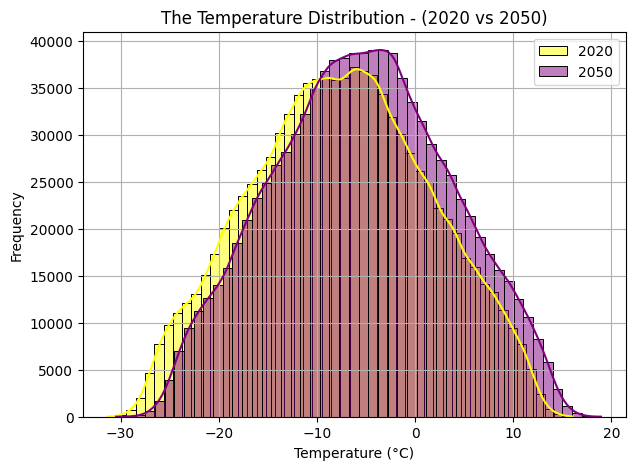

In [25]:
temp_2020 = load_raster_data(raster_temperature_path_2020)
temp_2050 = load_raster_data(raster_temperature_path_2050)

plot_distribution(temp_2020, temp_2050, title="The Temperature Distribution - (2020 vs 2050)" , xlabel="Temperature (°C)", color1="yellow", color2="purple")

In [26]:
# Compute statistics for temperature
stats_2020 = {
    "Mean": np.mean(temp_2020),
    "Median": np.median(temp_2020),
    "Min": np.min(temp_2020),
    "Max": np.max(temp_2020)
}
stats_2050 = {
    "Mean": np.mean(temp_2050),
    "Median": np.median(temp_2050),
    "Min": np.min(temp_2050),
    "Max": np.max(temp_2050)
}

print_stats(stats_2020,"Temperature (°C)",2020)
print("\n\n")
print_stats(stats_2050,"Temperature (°C)",2050)

Statistical Description of Temperature (°C) for 2020 - Nepal
Statistic      Temperature (°C)    
------------------------------
Mean           -7.5770             
Median         -7.5626             
Min            -31.2943            
Max            16.0530             



Statistical Description of Temperature (°C) for 2050 - Nepal
Statistic      Temperature (°C)    
------------------------------
Mean           -5.4719             
Median         -5.4624             
Min            -30.4495            
Max            18.9317             


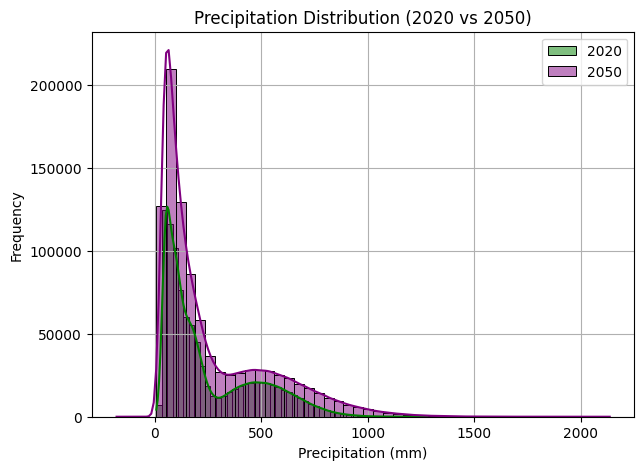

In [27]:
precip_2020 = load_raster_data(raster_precipitation_path_2020)
precip_2050 = load_raster_data(raster_precipitation_path_2050)

plot_distribution(precip_2020, precip_2050, title="Precipitation Distribution (2020 vs 2050)", xlabel="Precipitation (mm)", color1="green", color2="purple")

In [28]:
# Compute statistics for precipitation
stats_2020_p = {
    "Mean": np.mean(precip_2020),
    "Median": np.median(precip_2020),
    "Min": np.min(precip_2020),
    "Max": np.max(precip_2020)
}
stats_2050_p = {
    "Mean": np.mean(precip_2050),
    "Median": np.median(precip_2050),
    "Min": np.min(precip_2050),
    "Max": np.max(precip_2050)
}

print_stats(stats_2020_p,"Precipitations (mm)",2020)
print("\n\n")
print_stats(stats_2050_p,"Precipitations (mm)",2050)

Statistical Description of Precipitations (mm) for 2020 - Nepal
Statistic      Precipitations (mm) 
------------------------------
Mean           249.8937            
Median         156.6795            
Min            6.8563              
Max            1279.3072           



Statistical Description of Precipitations (mm) for 2050 - Nepal
Statistic      Precipitations (mm) 
------------------------------
Mean           265.4966            
Median         150.6749            
Min            -179.9914           
Max            2137.1091           


Conclusion from Precipitation and Temperature Histogram (2020–2050):
The temperature and precipitation histograms for 2020 and 2050 exhibit a similar pattern. However, 2050 shows an overall increase in both rainfall and temperature throughout the year.
